In [1]:
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from array import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns



def fetch_data (upto_dates = 10 , tickers='SHIB-USD'):
  data = yf.download(tickers=tickers, period = f'{upto_dates}d', interval = '1d')
  new_array = np.array(data.index.to_pydatetime(), dtype=np.datetime64)
  o = data.iloc[: , 0].values
  h = data.iloc[: , 1].values
  l = data.iloc[: , 2].values
  c = data.iloc[: , 3].values
  df= pd.DataFrame(new_array)
  df.columns = ['Date']
  df['Open']=o
  df['High']=h
  df['Low']=l
  df['Close']=c
  return df

     |████████████████████████████████| 6.3 MB 37.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=98a099cc43a503a2baaab35f8097343d6f3534cd648a2c8b7683fcfed2041fe1
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [22]:
df=fetch_data(300)
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
0,2021-05-19,0.000016,0.000016,0.000006,0.000009
1,2021-05-20,0.000009,0.000012,0.000008,0.000010
2,2021-05-21,0.000010,0.000010,0.000007,0.000008
3,2021-05-22,0.000008,0.000010,0.000007,0.000008
4,2021-05-23,0.000008,0.000010,0.000007,0.000008
...,...,...,...,...,...
139,2021-10-05,0.000013,0.000020,0.000012,0.000017
140,2021-10-06,0.000017,0.000029,0.000017,0.000028
141,2021-10-07,0.000028,0.000035,0.000021,0.000023
142,2021-10-08,0.000023,0.000029,0.000021,0.000027


In [23]:

cols =['Close']

In [24]:
df_for_training = df[cols].astype(float)
print(df_for_training.shape)
df_for_training.head(7)

(144, 1)


,Close
0,0.000009
1,0.000010
2,0.000008
3,0.000008
4,0.000008
5,0.000011
6,0.000009


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [26]:
trainX = []
trainY = []
n_past = 10
for i in range(n_past, len(df_for_training_scaled)):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i , 0])   # predict only open for next day

trainX = np.array(trainX)
trainY = np.array(trainY)
print('shape of trainx is :',trainX.shape)
print('shape of trainy is :',trainY.shape)

shape of trainx is : (134, 10, 1)
shape of trainy is : (134,)


In [27]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(32))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 256)           264192    
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 128)           197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 64)            49408     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [28]:
history = model.fit(trainX, trainY, epochs=100,  validation_split=0.1, verbose=1)


Epoch 1/100
4/4 [==============================] - 5s 274ms/step - loss: 0.0041 - val_loss: 0.2410
Epoch 2/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0019 - val_loss: 0.2182
Epoch 3/100
4/4 [==============================] - 0s 77ms/step - loss: 0.0024 - val_loss: 0.2254
Epoch 4/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0019 - val_loss: 0.2353
Epoch 5/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0019 - val_loss: 0.2389
Epoch 6/100
4/4 [==============================] - 0s 76ms/step - loss: 0.0019 - val_loss: 0.2362
Epoch 7/100
4/4 [==============================] - 0s 76ms/step - loss: 0.0018 - val_loss: 0.2328
Epoch 8/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0019 - val_loss: 0.2298
Epoch 9/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0019 - val_loss: 0.2301
Epoch 10/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0018 - val_loss: 0.2325
Epoch 11/100
4/4 [

[*********************100%***********************]  1 of 1 completed
[7.375773478238926e-06, 7.379160110364486e-06, 7.454988190306981e-06, 7.554280383844508e-06, 7.66638935059986e-06, 7.74849005644564e-06, 7.811866240812516e-06, 7.832634309441061e-06, 7.834382767917588e-06, 7.834359532588996e-06, 7.813997418344275e-06, 7.792203841891672e-06, 7.754307352891843e-06, 7.713098501834631e-06, 7.67633722460314e-06]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


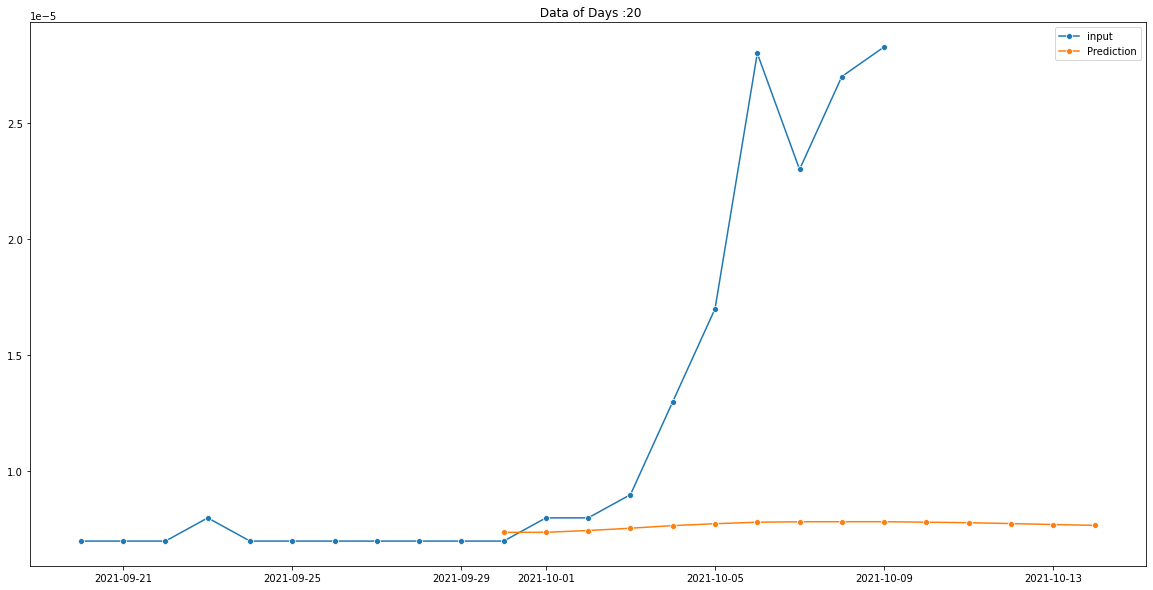

In [29]:
df=fetch_data(20)
data =df['Close']
init_date = df["Date"][0]
data = np.array(data)
# print(data)

data1= data[:10]

input_data =data1
data_scaled = data1.reshape((n_past,1))
# print(len(data_scaled))
data_scaled = scaler.transform(data_scaled).tolist()
out_data = []
i=0
ran = len(data)-5


while(i<ran):
  x_input=data_scaled[len(data_scaled)-n_past:]
#   print(f" for input : {x_input}")
  x_input=np.array(x_input).reshape((1,n_past,1))
  y_pred = model.predict(x_input)[0][0]
  # print(f" Output is : {y_pred}")
  actual_p =scaler.inverse_transform([[y_pred]]).tolist()
  out_data.append(actual_p[0][0])
  data_scaled.append([y_pred])
  i=i+1
print(out_data)
plt.figure(figsize=(20,10))
datelist = pd.date_range(init_date , periods=len(data)+i-1)
sns.lineplot(datelist[:len(data)],data, label='input', marker='o')
sns.lineplot(datelist[10:len(data)+5],out_data ,label='Prediction', marker='o')
# sns.lineplot(datelist[10:len(data)+10],out_data ,label='Prediction', linestyle='dashed')
# plt.plot(np.arange(0,len(data)),data, label='input', marker='o')
# plt.plot(np.arange(10,len(data)),out_data ,label='Prediction', linestyle='dashed')
plt.title(f" Data of Days :{len(data)}")
plt.legend()


[*********************100%***********************]  1 of 1 completed
len_daat 20
len_daat1 10
out_len : 10


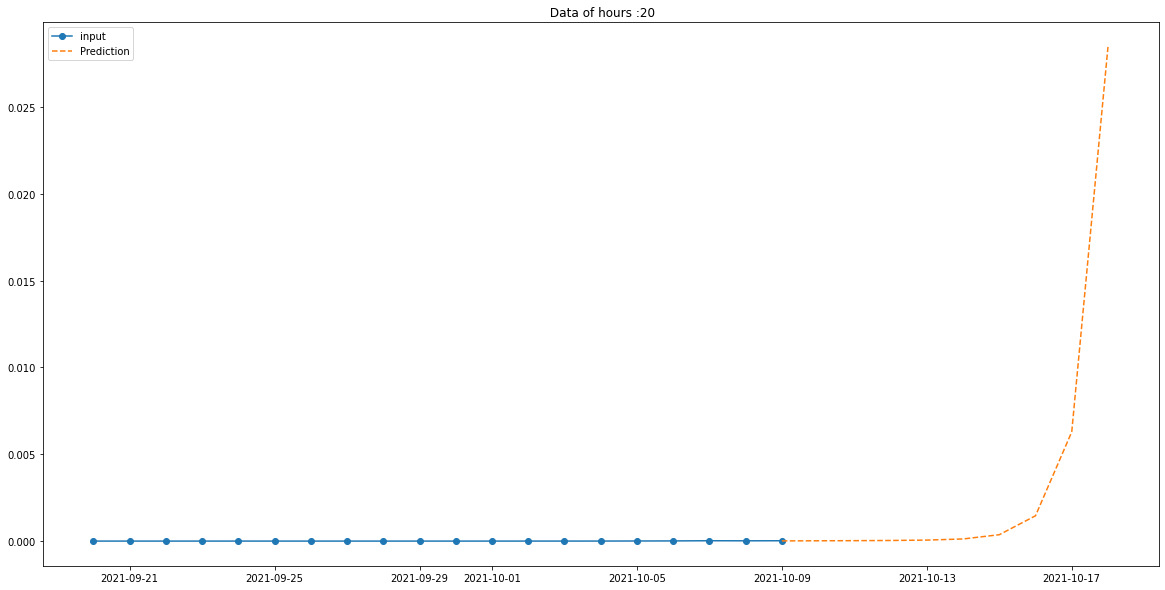

In [30]:
#  prediction of future 10 days

df=fetch_data(20)
data =df['Open']
init_date = df["Date"][0]
print("len_daat",len(data))

data = np.array(data)
data1= data[len(data)-10:]
print("len_daat1",len(data1))
input_data =data1
data_scaled = data1.reshape((n_past,1))
data_scaled = scaler.transform(data_scaled).tolist()
out_data = []
i=0
ran = len(data)-10

while(i<ran):
  x_input=data_scaled[len(data_scaled)-n_past:]
  # print(f" for input : {x_input}")
  x_input=np.array(x_input).reshape((1,n_past,1))
  y_pred = model.predict(x_input)[0][0]
  # print(f" Output is : {y_pred}")
  pred_p =scaler.inverse_transform([[y_pred]]).tolist()
  out_data.append(pred_p[0][0])
  data_scaled.append([y_pred])
  i=i+1
print("out_len :",len(out_data))
# print("out_ :",out_data)
plt.figure(figsize=(20,10))

# print(datelist[:5])
# plt.plot(np.arange(0,len(data)),data, label='input', marker='o')
# plt.plot(np.arange(len(data)-1,len(data)+9),out_data ,label='Prediction', linestyle='dashed')

datelist = pd.date_range(init_date , periods=len(data)+i-1)
plt.plot(datelist[:len(data)],data, label='input', marker='o')
plt.plot(datelist[len(data)-1:],out_data ,label='Prediction', linestyle='dashed')
plt.title(f" Data of hours :{len(data)}")
plt.legend()

In [31]:
# df=fetch_data(10)
# data =df['Open']
# data = np.array(data)
# data1= data[len(data)-n_past:]

# input_data =data1
# data_scaled = data1.reshape((n_past,1))
# data_scaled = scaler.transform(data_scaled).tolist()
# out_data = []
# i=0

# while(i<10):
#   x_input=data_scaled[len(data_scaled)-n_past:]
#   print(f" for input : {x_input}")
#   x_input=np.array(x_input).reshape((1,n_past,1))
#   y_pred = model.predict(x_input)[0][0]
#   print(f" Output is : {y_pred}")
  
#   out_data.append(scaler.inverse_transform([y_pred])[0])
#   data_scaled.append([y_pred])
#   i=i+1
# plt.figure(figsize=(20,10))
# plt.plot(np.arange(0,len(data)),data, label='input')
# plt.plot(np.arange(len(data),len(data)+i),out_data ,label='Prediction')
# plt.title(f" Data of hours :{len(data)}")
# plt.legend()

In [32]:
len(data)

20

In [33]:
[[0.36246806383132935]]

[[0.36246806383132935]]

In [34]:
data = yf.download(tickers='BTC-USD', period = '10d', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [35]:
data['Volume']

Date
2021-09-30    31141681925
2021-10-01    42850641582
2021-10-02    30614346492
2021-10-03    26638115879
2021-10-04    33383173002
2021-10-05    35873904236
2021-10-06    49034730168
2021-10-07    36807860413
2021-10-08    34800873924
2021-10-09    32458870784
Name: Volume, dtype: int64

In [36]:
model.save('LSTM_V2_SHIB.h5')

[*********************100%***********************]  1 of 1 completed
len_daat 20
len_daat1 10
out_len : 10


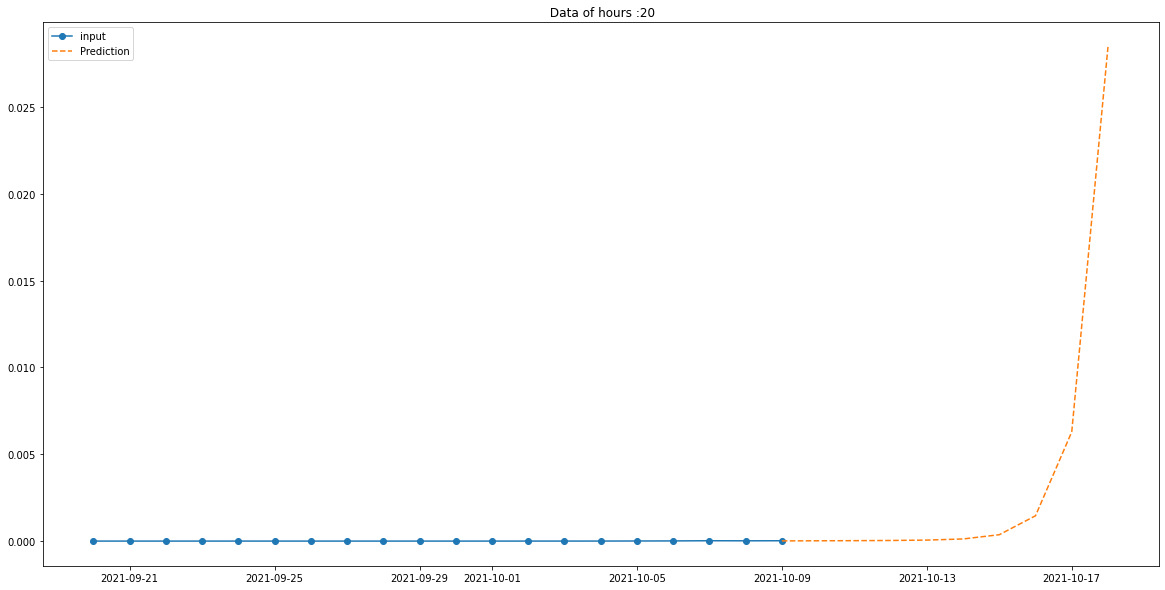

In [37]:
#  prediction of future 10 days

df=fetch_data(20)
data =df['Open']
init_date = df["Date"][0]
print("len_daat",len(data))

data = np.array(data)
data1= data[len(data)-10:]
print("len_daat1",len(data1))
input_data =data1
data_scaled = data1.reshape((n_past,1))
data_scaled = scaler.transform(data_scaled).tolist()
out_data = []
i=0
ran = len(data)-10

while(i<ran):
  x_input=data_scaled[len(data_scaled)-n_past:]
  # print(f" for input : {x_input}")
  x_input=np.array(x_input).reshape((1,n_past,1))
  y_pred = model.predict(x_input)[0][0]
  # print(f" Output is : {y_pred}")
  pred_p =scaler.inverse_transform([[y_pred]]).tolist()
  out_data.append(pred_p[0][0])
  data_scaled.append([y_pred])
  i=i+1
print("out_len :",len(out_data))
# print("out_ :",out_data)
plt.figure(figsize=(20,10))

# print(datelist[:5])
# plt.plot(np.arange(0,len(data)),data, label='input', marker='o')
# plt.plot(np.arange(len(data)-1,len(data)+9),out_data ,label='Prediction', linestyle='dashed')

datelist = pd.date_range(init_date , periods=len(data)+i-1)
plt.plot(datelist[:len(data)],data, label='input', marker='o')
plt.plot(datelist[len(data)-1:],out_data ,label='Prediction', linestyle='dashed')
plt.title(f" Data of hours :{len(data)}")
plt.legend()

In [38]:
from pickle import dump
dump(scaler, open('scaler_shib.pkl', 'wb'))

In [39]:
from pickle import load

In [40]:
# scaler_new = load(open('scaler_for_doge.pkl', 'rb'))

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
import os

In [44]:
import shutil

shutil.move("/content/LSTM_V2_SHIB.h5", "/content/drive/MyDrive/Colab Notebooks")

FileNotFoundError: ignored

In [ ]:
! pip install scikit-learn